In [1]:
# Other ideas for subsequent project or this project:
# Duplicate the proprietary trading method from IBD
# Since the IBD subscription will be expire in 1 month, need to duplicate to find the stock
# Right now, find the stocks based on criterias from IBD

In [2]:
# The objective of the project is to use technical and quantitative analyses to confirm the stocks 
# that we found on investor.com is investable 

In [3]:
## These screen below are fundamental analysis
# Screen 1: Select stock within 10% of their all-time high
# Screen 2: Price < $25
# Screen 3: EPS rank > 80 (80% of all the companies listed have lower EPS growth than this stock does)
# Screen 4: High relative strength figure 80+
# Screen 5: Stock with group strength A (This compares the stock's industry group over past 6 months to the other 196 groups)

## We should get a handful stocks. More filter using technical analysis
# 50 Day Moving Average. If the stock price is above the 50-day simple moving average (SMA), then there might be a tendency 
# toward continued growth. When a stock price breaks below a 50-day SMA, the stock might tend to continue to decline.

# Williams %R technical indicator
# Since things tend to revert to the average, when a stock is in an extremely oversold, there will be a tendency for it to bounce back.
# When it dips to the 90 percent oversold position, this is preliminary buy signal

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
# Download the adjust close data from S&P 500, NACCO Industry (NC), Comstock Resources (CRK) and Southwestern Energy (SWN)

#closePriceSP = yf.download("^GSPC SWN NC CRK", start='2017-06-15',end='2022-06-15')['Adj Close']

In [6]:
aapl = yf.download("AAPL", start='2022-01-01',end='2022-10-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176544,86709100


In [8]:
# Examine the summary statistic 
aapl.aggregate([min,np.mean,np.std,np.median,max]).round(3)

,Open,High,Low,Close,Adj Close,Volume
min,130.070,132.390,129.040,130.060,129.664,5.121820e+07
mean,158.769,160.898,156.691,158.831,158.257,8.934461e+07
std,12.310,12.070,12.330,12.210,12.072,2.392767e+07
median,160.255,162.890,157.675,159.735,158.865,8.491905e+07
max,182.630,182.940,179.120,182.010,180.960,1.826020e+08


In [9]:
# When the squiggly line is in the upper range above the neutral line, then the stock is overbought, 
# meaning that there are more buyers than sellers. When the Williams % R line drops to the lower range, below neutral, 
# then the stock is oversold, meaning that there are more sellers than buyers.

## Calculate Moving Average

In [10]:
# The idea is that the trader should go long on a stock when 
# the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true

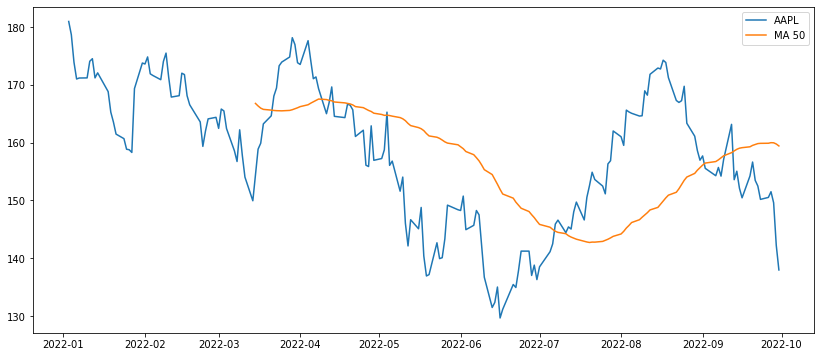

In [11]:
plt.figure(figsize=(14,6))
aapl_50 = aapl['Adj Close'].rolling(50).mean()
plt.plot(aapl['Adj Close'],label='AAPL')
plt.plot(aapl_50,label = "MA 50")
plt.legend()
plt.show()

In [12]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [13]:
def get_wr(high, low, close, lookback):
    highh = high.rolling(lookback).max() 
    lowl = low.rolling(lookback).min()
    wr = -100 * ((highh - close) / (highh - lowl))
    return wr

aapl['wr_14'] = get_wr(aapl['High'], aapl['Low'], aapl['Adj Close'], 14)
aapl = aapl.dropna()

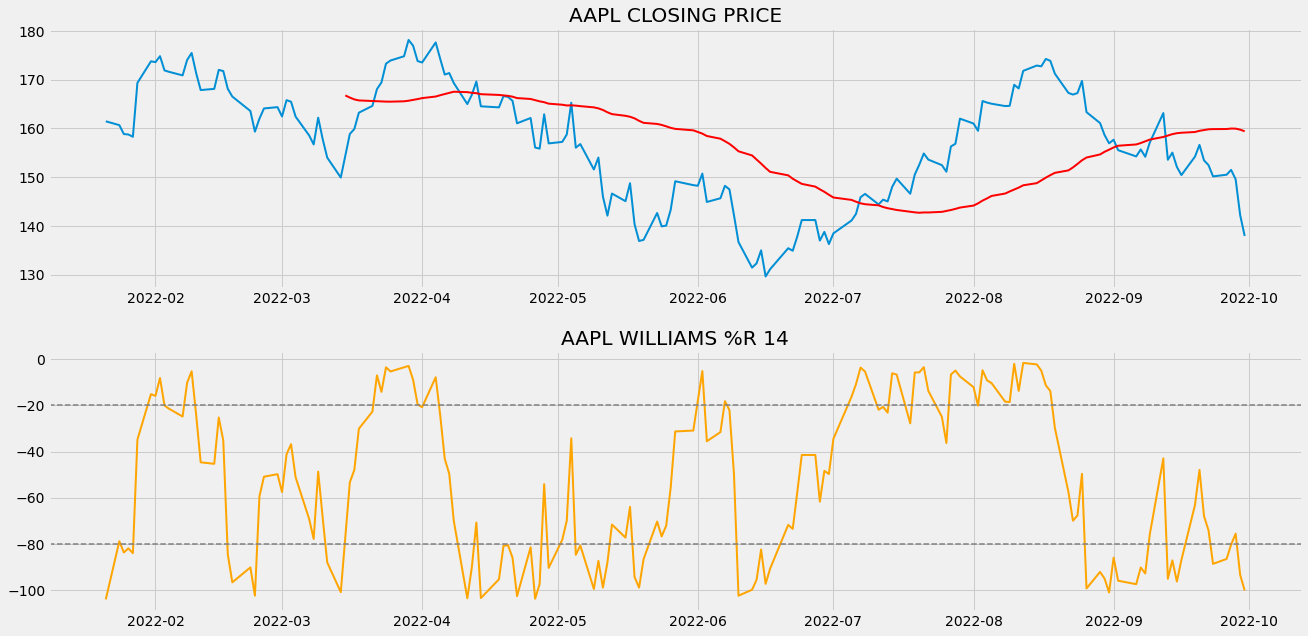

In [14]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(aapl['Adj Close'], linewidth = 2)
ax1.plot(aapl_50, linewidth = 2,color='red')
ax1.set_title('AAPL CLOSING PRICE')
ax2.plot(aapl['wr_14'], color = 'orange', linewidth = 2)
ax2.axhline(-20, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.axhline(-80, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.set_title('AAPL WILLIAMS %R 14')
plt.show()

In [18]:
def implement_wr_strategy(prices, wr):    
    buy_price = []
    sell_price = []
    wr_signal = []
    signal = 0

    for i in range(len(wr)):
        if wr[i-1] > -90 and wr[i] < -90:    # Buy when previous > -90
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                wr_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                wr_signal.append(0)
        elif wr[i-1] < -10 and wr[i] > -10:  # Sell when previous < -10
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                wr_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                wr_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            wr_signal.append(0)
            
    return buy_price, sell_price, wr_signal
            
buy_price, sell_price, wr_signal = implement_wr_strategy(aapl['Adj Close'], aapl['wr_14'])

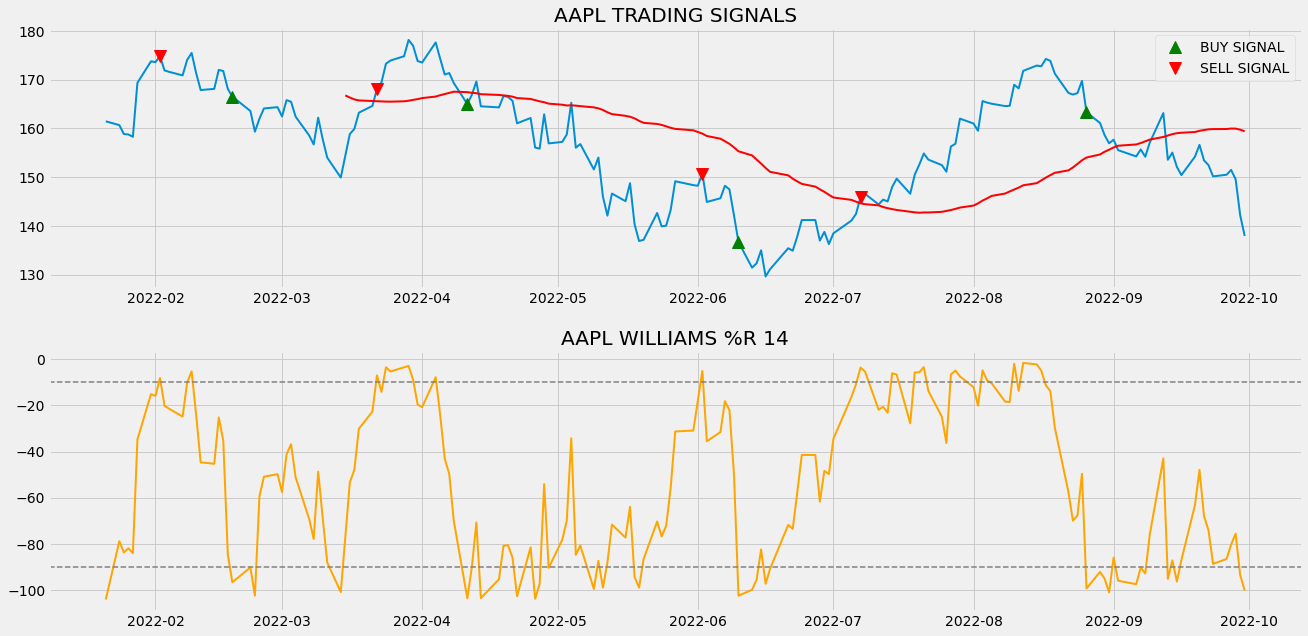

In [20]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(aapl['Adj Close'], linewidth = 2)
ax1.plot(aapl_50, linewidth = 2,color='red')
ax1.plot(aapl.index, buy_price, marker = '^', markersize = 12, linewidth = 0, color = 'green', label = 'BUY SIGNAL')
ax1.plot(aapl.index, sell_price, marker = 'v', markersize = 12, linewidth = 0, color = 'r', label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title('AAPL TRADING SIGNALS')
ax2.plot(aapl['wr_14'], color = 'orange', linewidth = 2)
ax2.axhline(-10, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.axhline(-90, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.set_title('AAPL WILLIAMS %R 14')
plt.show()

In [17]:
# If we only base our trading decision on Williams %R alone, it will not be a good investment. For example, between June and mid August, 
# although the stock was oversold, as indicated that the Williams is smaller than 10, the stock kept going up.

In [ ]:
# I bought 1,400 AAPL shares on June 15th at 133.13
# Sold 1,400 shares on August 24th at 167.71

In [1]:
# Profit
(167.71 - 133.13 ) * 1400

48412.000000000015

In [2]:
# Return 
(167.71 - 133.13 ) * 1400 / (1400*133.13)

0.25974611282205373

In [ ]:
# Return on investment is approximately 26% in 2 months 

## Build IBD Stock Screener

In [1]:
from yahoo_fin import stock_info as si

In [2]:
tickers = si.tickers_sp500()